# Quick Start
### To start the application, click the 'Run' button on the toolbar at the top of your screen. Then, click 'Run All'.
Alternatively, if there is no "Run" button on the toolbar look for the "Cell" button. 


# Application Usage

Use the Navigation menu to move to different areas of the application. Visit "Predict House Value" to generate house value assessments, or "Data Visualization" to view data visualizations.

#### Navigation
- ->Application Usage
- [Data Pipeline (advanced)](#Data-Pipeline)
- [Prepare Data for Visualization (advanced)](#Prepare-Data-for-Visualization)
- [Data Visualization](#Data-Visualizations)
- [Train and Test the Prediction Model (advanced)](#Train-and-Test-the-Prediction-Model)
- [Predict House Value](#Predict-House-Value)

## Setup

#### Setup occurs automatically. New users should follow the quick start instructions. Advanced users may proceed to troubleshoot and customize application performance.

### Dependency Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display, clear_output
import ipywidgets as widgets

# Data Pipeline

WARNING: This section should only be modified by advanced users.

#### Navigation
- [Application Usage](#Application-Usage)
- ->Data Pipeline (advanced)
- [Prepare Data for Visualization (advanced)](#Prepare-Data-for-Visualization)
- [Data Visualization](#Data-Visualizations)
- [Train and Test the Prediction Model (advanced)](#Train-and-Test-the-Prediction-Model)
- [Predict House Value](#Predict-House-Value)

### Load Raw Data from File
Load data from the 'data.csv' file located in the same directory as the application.

In [58]:
# Load CSV into pandas data frame
df = pd.read_csv('./data.csv')
df.head() # Display first 5 rows of raw data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


### Remove incomplete data
Data points with missing values in any field are discarded.

In [42]:
# Remove data points with missing values
df = df.dropna(axis=0, how='any')

### Homogenize units
The 'lot_size' field describes the size of a property in either acres or sqft. Convert all the values into sqft.
The 'size' field describing indoor floor area is already exclusively in sqft.

In [44]:
# Convert acres to sqft in lot_size
acre_to_sqft = 43560 # conversion factor
df.loc[df['lot_size_units'] == 'acre', 'lot_size'] *= acre_to_sqft
df.loc[df['lot_size_units'] == 'acre', 'lot_size_units'] = 'sqft'
df.head()

### Remove extraneous data and outliers
Extraneous data is identified based on ACME Realty’s business needs. ACME has noted it does not list ultra-luxury properties, including those selling for more than $5M, those with more than 10 bedrooms or bathrooms, or those sized greater than 25,000 sqft. Data points exceeding these values in the Bedrooms, Bathrooms, Size, or Price fields are dropped


Outlier data is also dropped in this step. Outlier data is defined as properties with less than 1 bathroom or very large lot sizes (greater than 100,000 sqft).

In [59]:
# Remove extraneous data
df = df[df['price'] <= 5000000]
df = df[df['beds'] <= 10]
df = df[df['baths'] <= 10]
df = df[df['size'] <= 25000]

# Remove outliers
df = df[df['baths'] >= 1]
df = df[df['lot_size'] <= 100000]

### Display processed data
The first 5 rows of data are presented below in a table as an example of the data set and to validate the data pipeline was successful.

In [46]:
# Display first 5 rows of data
df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
5,2,2.0,1190.0,sqft,43560.0,sqft,98107,740000.0


# Prepare Data for Visualization

WARNING: This section should only be modified by advanced users.

#### Navigation
- [Application Usage](#Application-Usage)
- [Data Pipeline (advanced)](#Data-Pipeline)
- ->Prepare Data for Visualization (advanced)
- [Data Visualization](#Data-Visualizations)
- [Train and Test the Prediction Model (advanced)](#Train-and-Test-the-Prediction-Model)
- [Predict House Value](#Predict-House-Value)

### Separate data into dependent and independent variables
In this case, the dependent variable is House Price and the dependent variables are features of the house, including:
- Number of Bedrooms
- Number of Bathrooms
- House Size
- Lot Size
- Zip Code

The data is split into the dependent (y) and independent (x) variables.

In [47]:
# Separate data into dependent (y) and independent variables (x)
x = df[['beds', 'baths', 'size', 'lot_size', 'zip_code']]
y = df['price']

### Transform data and define plots

In [48]:
# Store each unique zip code, number of beds, and number of baths
# This is necessary to generate the x-axis of the box plots
unique_zip_values = df['zip_code'].unique()
unique_zip_values.sort()

unique_bed_values = df['beds'].unique()
unique_bed_values.sort()
        
unique_bath_values = df['baths'].unique()
unique_bath_values.sort()

# Function to update the plot based on the user's selection
def update_plot(change):
    with out:
        clear_output(wait=True)  # Clear the output of the cell
        # Display a different plot depending on which button is selected
        match change['new']:
            # Number of Bedrooms vs. Sale Price (box plot)
            case 'Bedrooms':
                prices = []
                for val in unique_bed_values:
                    prices.append(df.loc[df['beds'] == val, 'price'])

                plt.boxplot(prices, showfliers=False)
                plt.xlabel('Bedrooms')
                plt.title('Number of Bedrooms vs. Sale Price')

            # Number of Bathrooms vs. Sale Price (box plot)
            case 'Bathrooms':
                prices = []
                for val in unique_bath_values:
                    prices.append(df.loc[df['baths'] == val, 'price'])

                plt.boxplot(prices, showfliers=False)
                plt.xticks(ticks=range(1, len(unique_bath_values) + 1), labels=unique_bath_values)
                plt.xlabel('Bathrooms')
                plt.title('Number of Bathrooms vs. Sale Price')

            # Size (floor area, sqft) vs. Sale Price (scatter plot)
            case 'Size':
                plt.scatter(x['size'], y)
                plt.xlabel('Size (sqft)')
                plt.title('House Size (sqft) vs. Sale Price')
                plt.grid(True)

            # Lot Size (sqft) vs. Sale Price (scatter plot)
            case 'Lot Size':
                plt.scatter(df['lot_size'], y)
                plt.xlabel('Lot Size (sqft)')
                plt.title('Lot Size (sqft) vs. Sale Price')
                plt.grid(True)
                
            # Zip Code vs. Sale Price (box plot)
            case 'Zip Code':
                prices = []
                for val in unique_zip_values:
                    prices.append(df.loc[df['zip_code'] == val, 'price'])

                plt.boxplot(prices, showfliers=False)
                plt.xticks(ticks=range(1, len(unique_zip_values) + 1), labels=unique_zip_values, rotation=90)
                plt.xlabel('Zip Code')
                plt.title('Zip Code vs. Sale Price')
            
        plt.ylabel('Sale Price (USD)')
        plt.show()

### Define User Interface controls

In [49]:
title = widgets.HTML(
    value="<h2>Select one of the 5 descriptive data visualizations:</h2>",
)

# Toggle button widget
toggle_buttons = widgets.ToggleButtons(
    options=['Bedrooms', 'Bathrooms', 'Size', 'Lot Size', 'Zip Code'],
    description='Select Feature:',
    disabled=False
)

# Link button click event to function
toggle_buttons.observe(update_plot, names='value')

# Data Visualizations

Use the buttons below to view 5 descriptive data visualizations showing the relationship between house prices and house features in the Seattle area. Depending on the feature, the visualization may be a scatter plot or box plot.

#### Navigation
- [Application Usage](#Application-Usage)
- [Data Pipeline (advanced)](#Data-Pipeline)
- [Prepare Data for Visualization (advanced)](#Prepare-Data-for-Visualization)
- ->Data Visualizations
- [Train and Test the Prediction Model (advanced)](#Train-and-Test-the-Prediction-Model)
- [Predict House Value](#Predict-House-Value)

In [50]:
# Output widget to capture the plot
out = widgets.Output()
display(toggle_buttons, out)

# Render the initial plot
update_plot({'new': toggle_buttons.value})

ToggleButtons(description='Select Feature:', options=('Bedrooms', 'Bathrooms', 'Size', 'Lot Size', 'Zip Code')…

Output()

# Train and Test the Prediction Model

WARNING: This section should only be modified by advanced users.

#### Navigation
- [Application Usage](#Application-Usage)
- [Data Pipeline (advanced)](#Data-Pipeline)
- [Prepare Data for Visualization (advanced)](#Prepare-Data-for-Visualization)
- [Data Visualization](#Data-Visualizations)
- ->Train and Test the Prediction Model (advanced)
- [Predict House Value](#Predict-House-Value)

### Split the data into training and testing sets
The training set is randomly selected and comprises 80% of the dataset. The remaining 20% is placed in the testing set. 

In [51]:
# Split the data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Train the multiple-linear regression model
The model is trained on the training set to predict the value of a house based on a combination of house features (bathrooms, bedrooms, size, lot size, and zip code).

In [52]:
# Train the multiple-linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Make test predictions
The trained model is used to predict prices (y-values) based on the features (x-values) in the testing set.

In [53]:
# Make predictions on the test set
y_pred = model.predict(x_test)

### Compare predictions to testing set
The predicted prices for houses in the testing set are compared against the actual price of those houses.

This is one way to assess the performance of the model - the closer the predictions are to the actual prices, the more accurate the model is.

HTML(value='<h3>Multiple-Linear Regression Model: Visualized Prediction Accuracy</h3>')

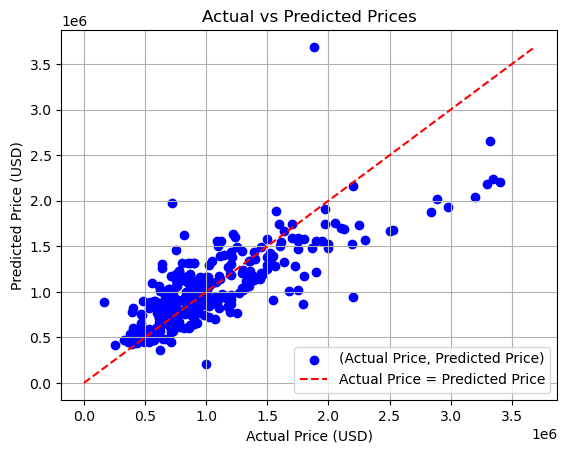

In [54]:
# Display HTML title
title = widgets.HTML(
    value="<h3>Multiple-Linear Regression Model: Visualized Prediction Accuracy</h3>",
)
display(title)

# Plot Actual vs Predicted prices
plt.scatter(y_test, y_pred, color='blue', label='(Actual Price, Predicted Price)')

# Plot a 100% accurate (perfect) prediction line
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Actual Price = Predicted Price')

# Define the plot features and display it
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Assess model performance using error metrics

Error metrics are calculated and presented in this section. These metrics are tracked as the model changes with the addition of new data, and are another way to assess the performance of the model.

In [55]:
# Display Error Metrics title
title2 = widgets.HTML(
    value="<h3>Multiple-Linear Regression Model: Error Metrics</h3>",
)
display(title2)

# Define and calculate error metrics
# Note: R^2 is only a valid metric for single-linear regression and is not used
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
rmse = np.sqrt(mse) # Root Mean Squared Error

# Define the error metrics in a list and format their values
metrics = [
    ['METRIC', 'VALUE'],
    ['Mean Absolute Error ($)', "{:,.2f}".format(mae)],
    ['Mean Squared Error', "{:,.0f}".format(mse)],
    ['Root Mean Squared Error', "{:,.0f}".format(rmse)],
]

# Create and populate table with error metrics
metrics_table = widgets.GridspecLayout(4, 2, width="400px")
metrics_table.layout.border = '1px solid black'

# Headers
for i, header in enumerate(metrics[0]):
    header_label = widgets.Label(value=header)
    metrics_table[0, i] = widgets.HTML(value="<b>" + header + "</b>")
    metrics_table[0, i].layout.border = '1px solid black'
    metrics_table[0, i].layout.padding = '5px'

# Populate the grid with labels representing the table data
for i in range(1, len(metrics)):
    for j, item in enumerate(metrics[i]):
        metrics_table[i, j] = widgets.Label(value=str(item))
        metrics_table[i, j].layout.border = '1px solid black'
        metrics_table[i, j].layout.padding = '5px'

# Display the table
display(metrics_table)

HTML(value='<h3>Multiple-Linear Regression Model: Error Metrics</h3>')

GridspecLayout(children=(HTML(value='<b>METRIC</b>', layout=Layout(border_bottom='1px solid black', border_lef…

# Predict House Value

Use the interface at the bottom of this section to predict the value of a house in the Seattle housing market based on number of bedrooms, bathrooms, floor size, lot size, and zip code.

#### Navigation
- [Application Usage](#Application-Usage)
- [Data Pipeline (advanced)](#Data-Pipeline)
- [Prepare Data for Visualization (advanced)](#Prepare-Data-for-Visualization)
- [Data Visualization](#Data-Visualizations)
- [Train and Test the Prediction Model (advanced)](#Train-and-Test-the-Prediction-Model)
- ->Predict House Value


In [60]:
# UI Elements
beds_widget = widgets.IntSlider(description='Beds:',min=1, max=10, value=3)

baths_widget = widgets.FloatSlider(description='Baths:', min=0.5, max=10, step=0.5, value=2)

size_widget = widgets.IntSlider(description='Size (sqft):', min=1, max=10000, value=1800)

lot_widget = widgets.IntSlider(description='Lot Size (sqft):', min=0.0, max=100000, value=3000)

# Dropdown populated with all the unique zips in the dataframe
zip_widget = widgets.Dropdown(options=unique_zip_values, description="Zip Code:", disabled=False, value=98118)

title = widgets.HTML(
    value="<h1>Enter house features to make a price prediction:</h1>",
)

predict_button = widgets.Button( description='Predict' )

prediction_output = widgets.HTML(
    value='<h3>Enter house features then press the "Predict" button.</h3>'
)

# Predict a house price based on the user's input when the "Predict" button is clicked
def on_click_predict(b):
    global model
    # Read the independent variables from the user's input
    input_values = [beds_widget.value, baths_widget.value, size_widget.value, lot_widget.value, zip_widget.value]
    input_labels = ['beds','baths','size','lot_size','zip_code']
    # Pass the independent variables into the model to retrieve a prediction
    predict_x = pd.DataFrame(data=[input_values], columns=input_labels)
    pred = model.predict(predict_x) # Predict price based on inputs
    
    # Format the prediction
    formatted_pred = "{:,.2f}".format(pred[0]) # thousands separator and truncate to 2 decimal points
    # Set output
    prediction_output.value='<h3>Predicted Price = <span style="color:green;">$' + str(formatted_pred) + '</span></h3>'

# Assign click listener to predict button
predict_button.on_click(on_click_predict)

# Order the widgets and vertically align them
vb = widgets.VBox([title, beds_widget, baths_widget, size_widget, lot_widget, zip_widget, predict_button, prediction_output])
# Display the widgets
display(vb)